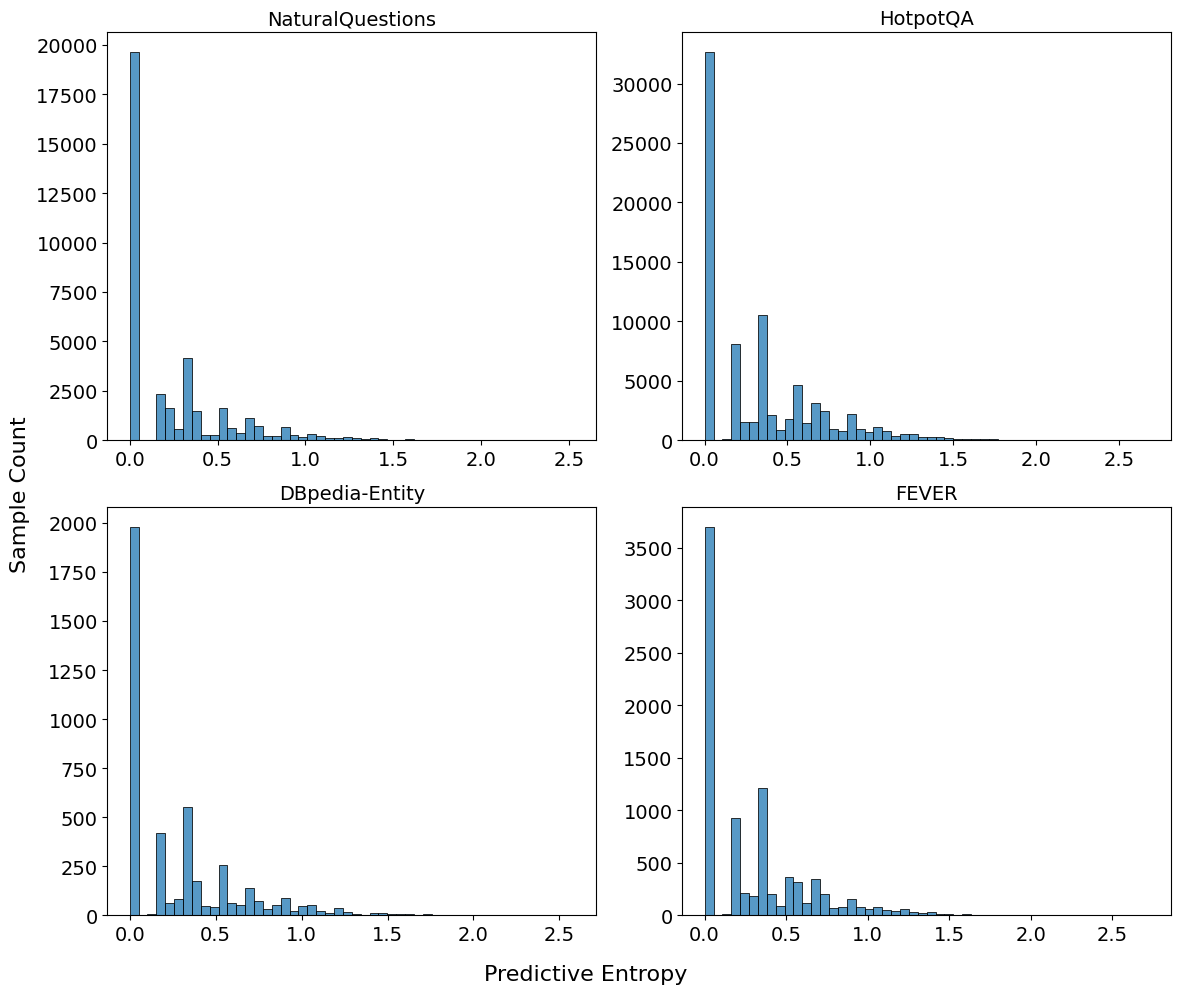

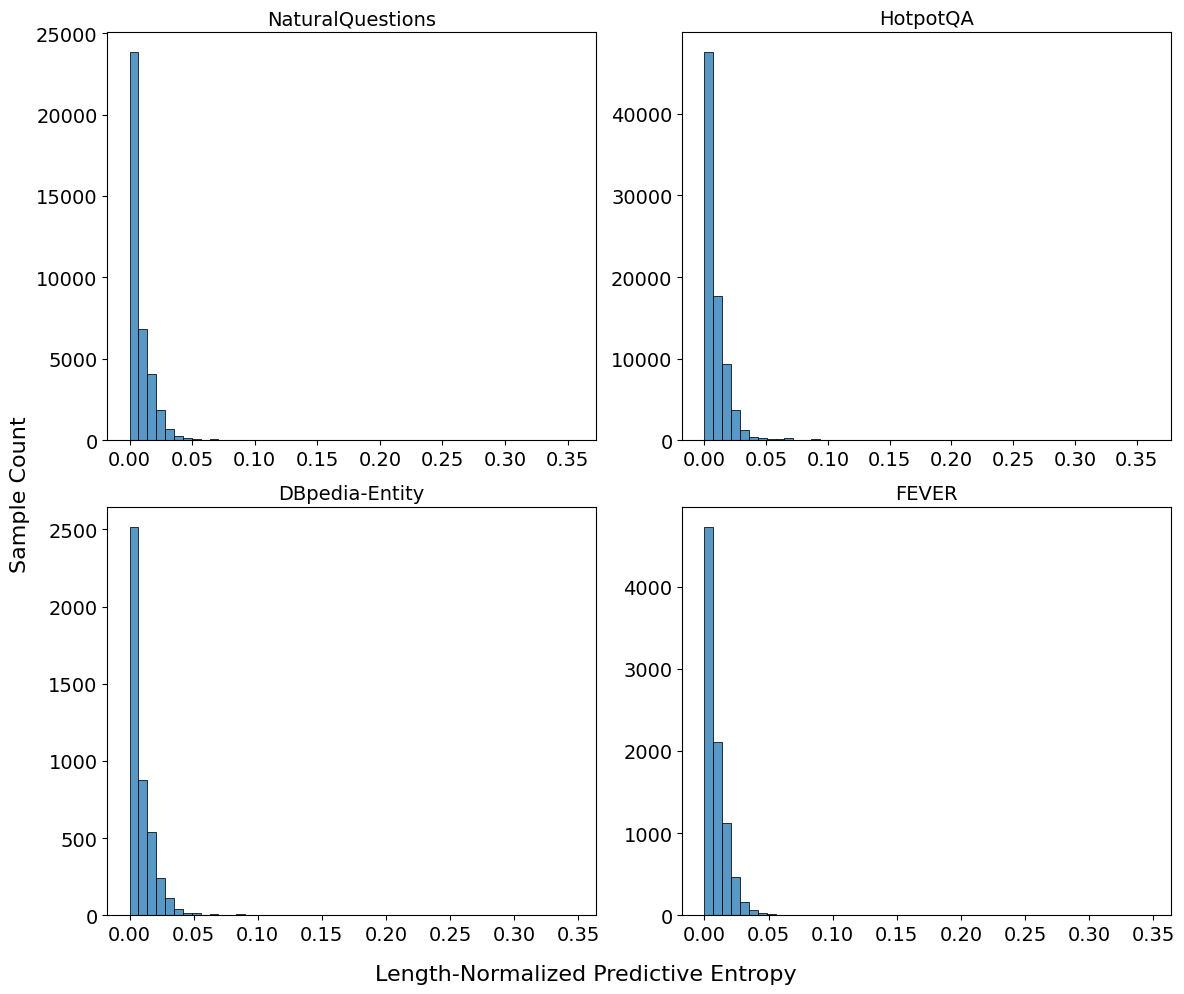

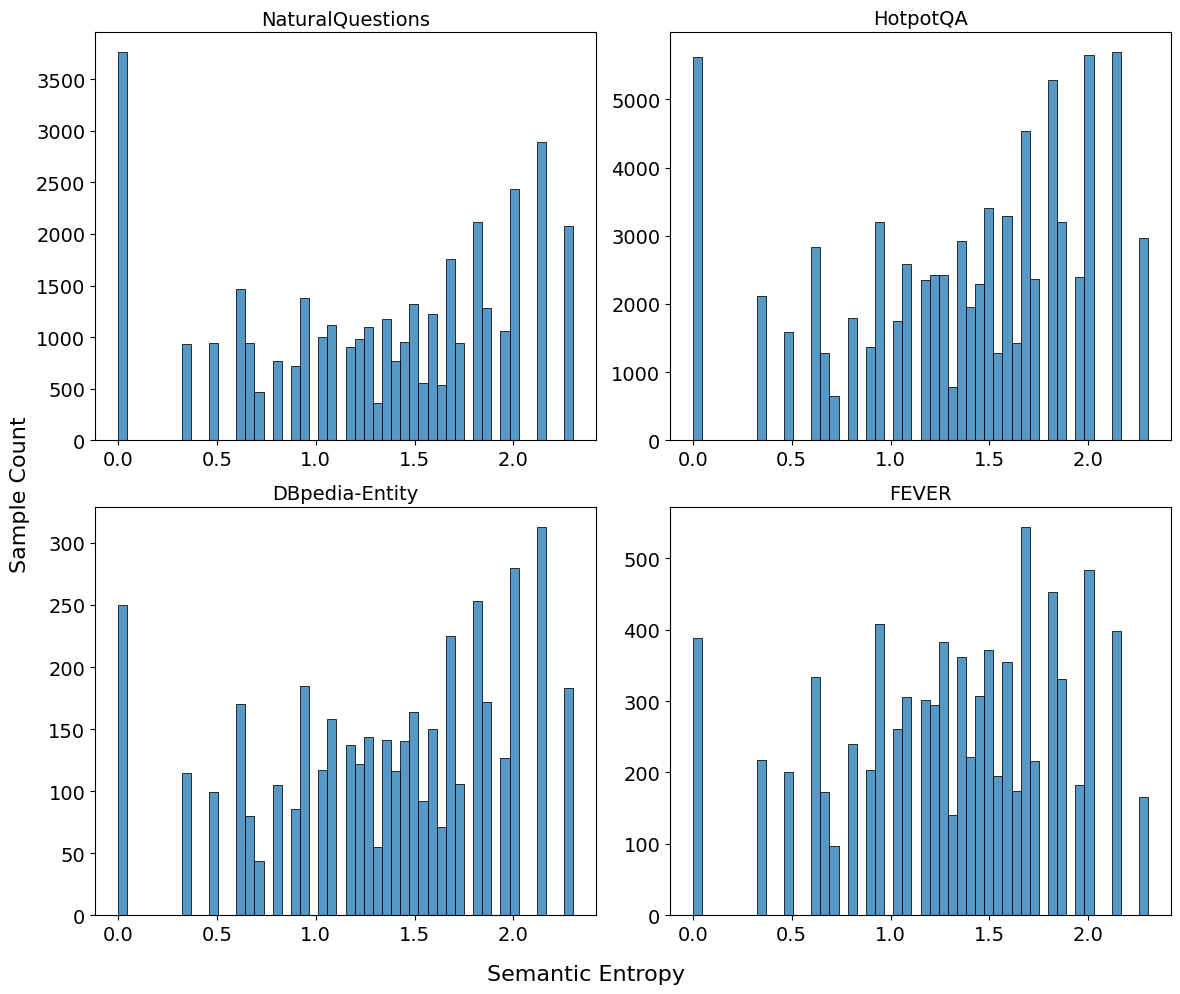

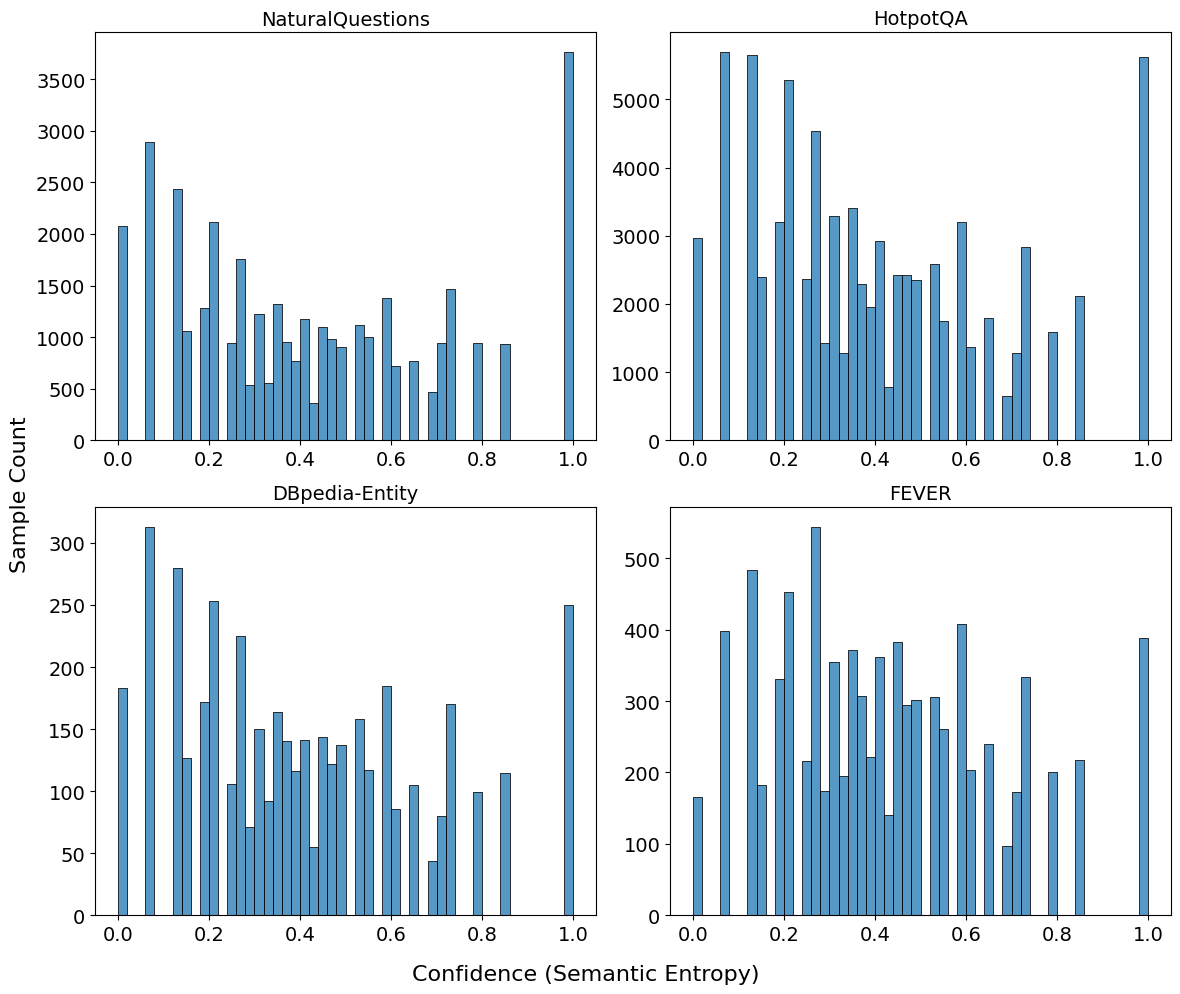

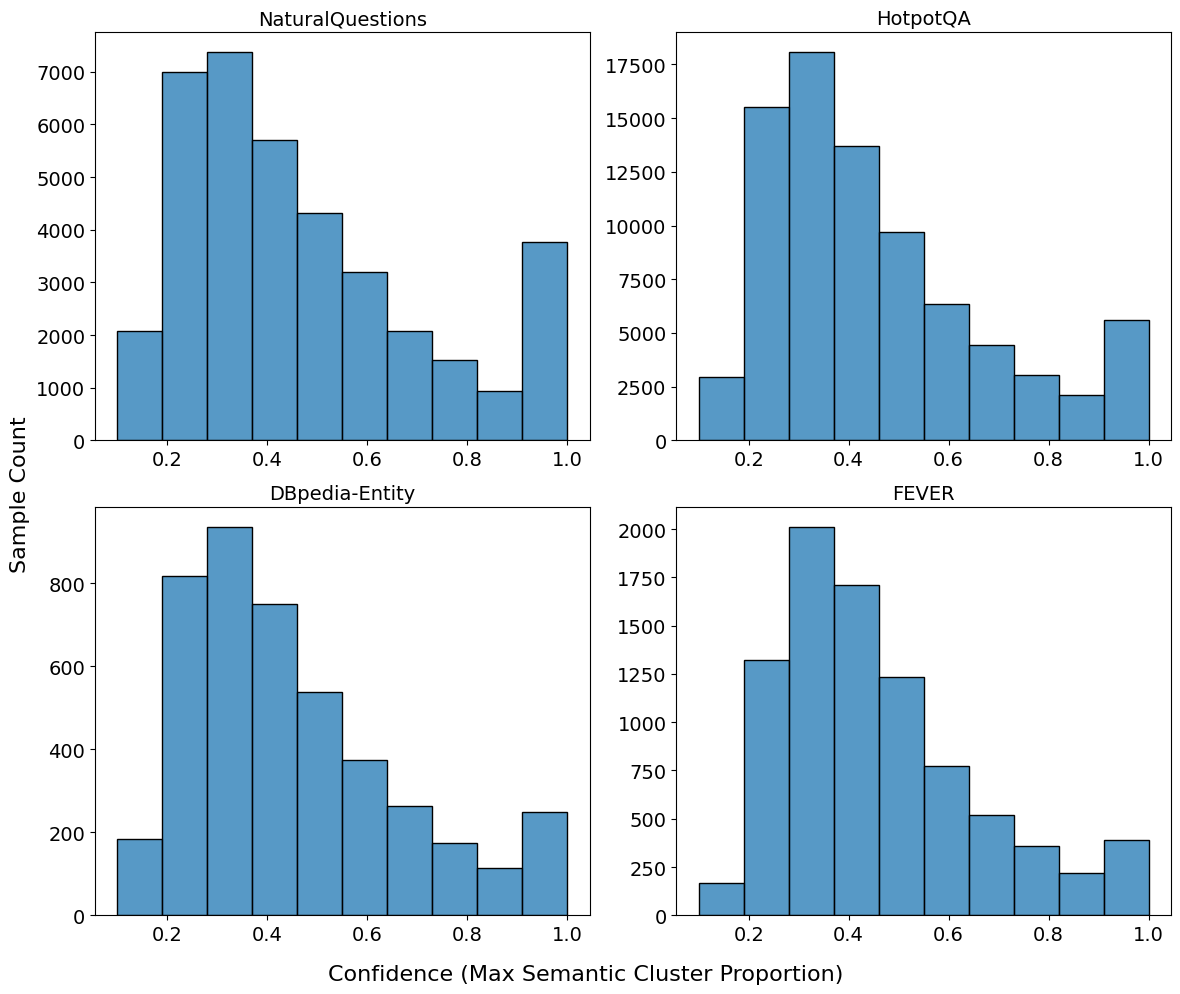

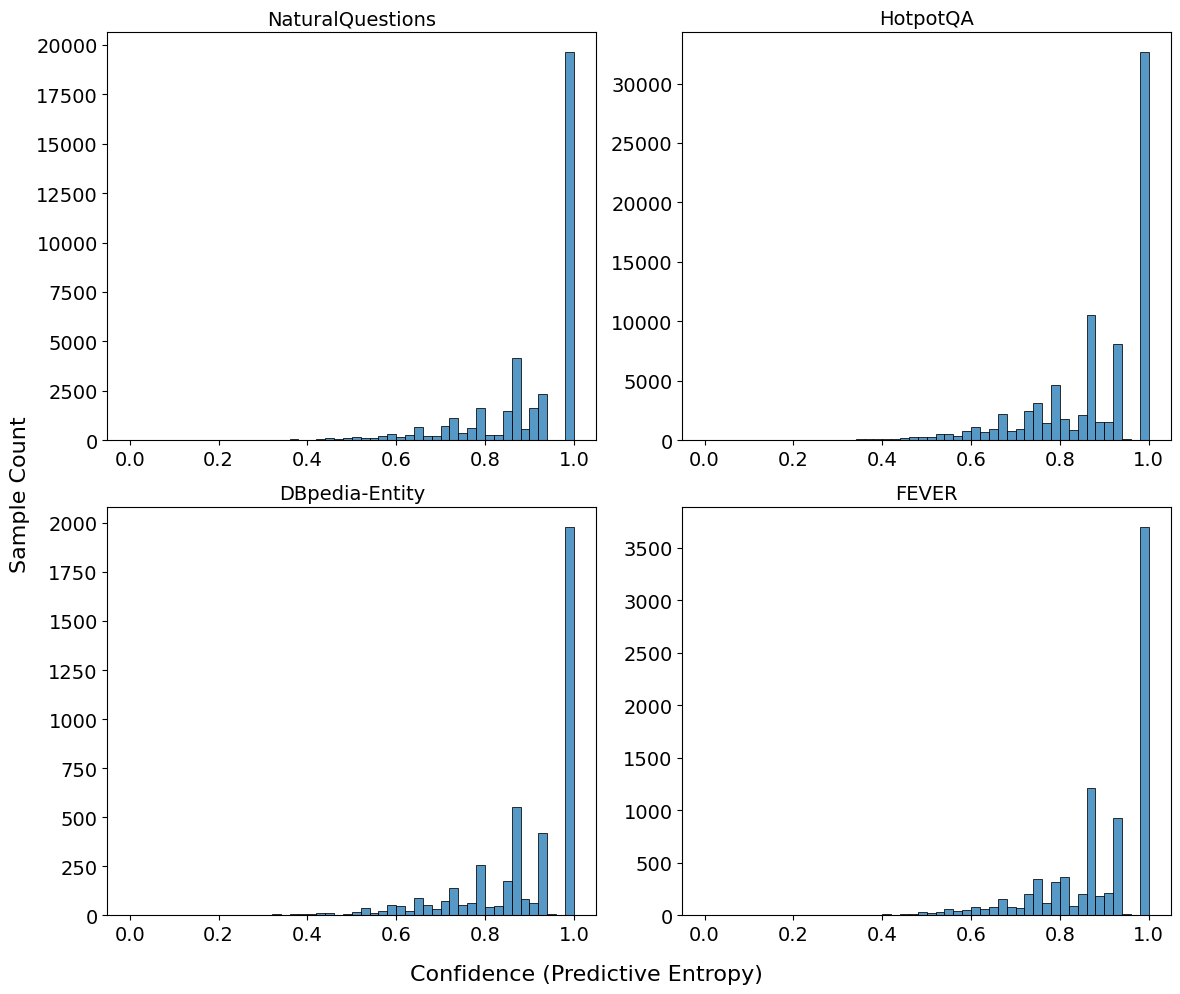

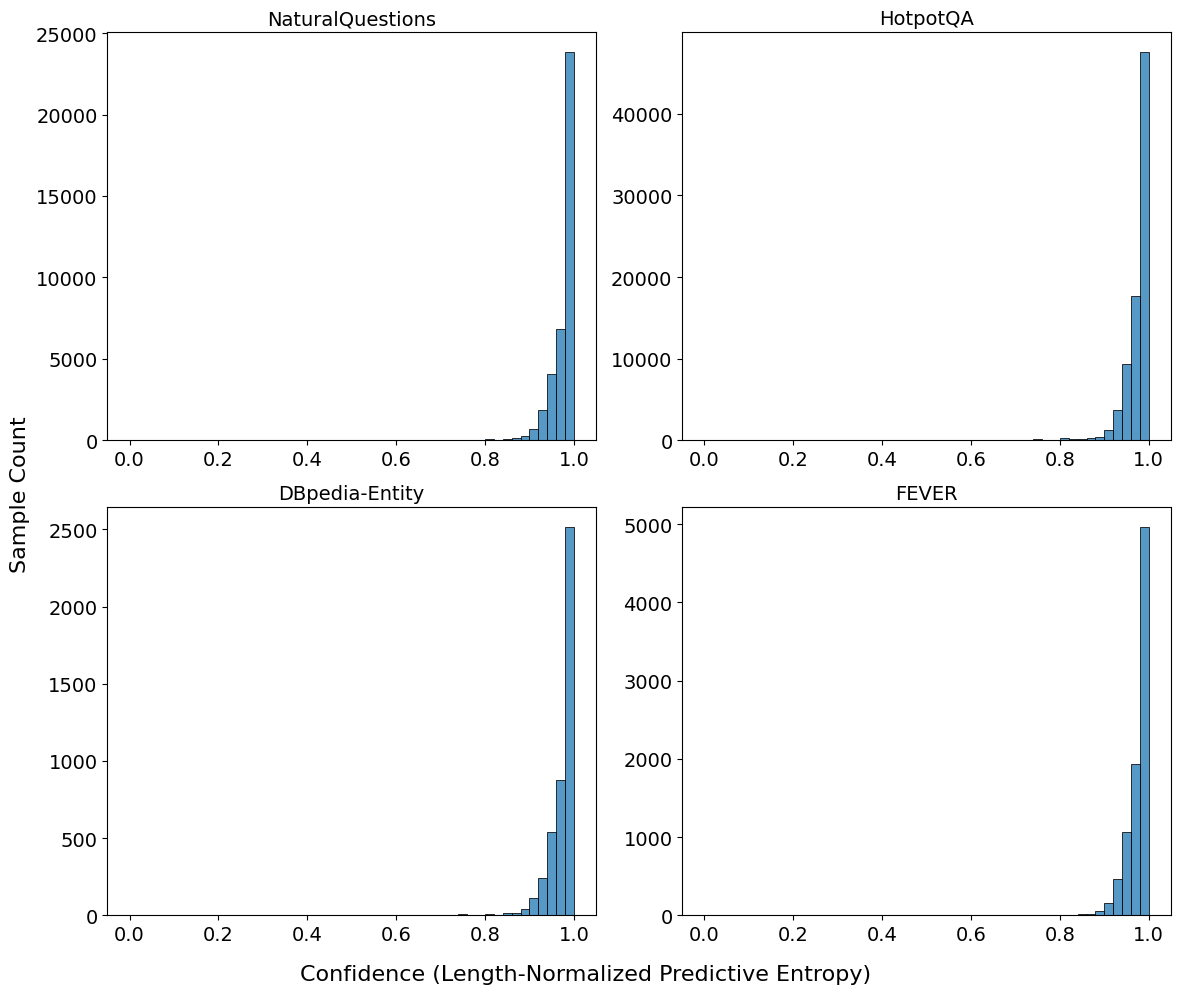

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

DIST_FIG_DIR = 'data/new/qwen7b-deberta-dist'
os.makedirs(DIST_FIG_DIR, exist_ok=True)
MEASUREMENT_DIR = "/mnt/s2t/backup/home/code/rerank-analysis/output/measure"
ALL_DATASET_NAMES = ["nq", "hotpotqa", "dbpedia-entity", "fever"]

new_key_mapping = {
    'pe': 'Predictive Entropy',
    'npe': 'Length-Normalized Predictive Entropy',
    'se': 'Semantic Entropy',
    'cse': 'Confidence (Semantic Entropy)',
    'mscp': 'Confidence (Max Semantic Cluster Proportion)',
    'cpe': 'Confidence (Predictive Entropy)',
    'cnpe': 'Confidence (Length-Normalized Predictive Entropy)'
}

new_dataset_mapping = {
    'nq': 'NaturalQuestions',
    'dbpedia-entity': 'DBpedia-Entity',
    'fever': 'FEVER',
    'hotpotqa': 'HotpotQA'
}

def load_pickle_file(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)


for key in ['pe', 'npe', 'se', 'cse', 'mscp', 'cpe', 'cnpe']:

    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False, sharey=False)
    axes = axes.ravel()
    
 
    for i, dataset in enumerate(ALL_DATASET_NAMES):
        ax = axes[i]

        data = load_pickle_file(f'{MEASUREMENT_DIR}/{dataset}-measure.pkl')

        values = [doc[key] for q in data.values() for doc in q.values()]
        

        bins = 10 if key == 'mscp' else 50
        sns.histplot(values, bins=bins, ax=ax, kde=False)
        
 
        ax.set_title(new_dataset_mapping[dataset], fontsize=14, loc='center')

        ax.set_ylabel('')
   
        ax.tick_params(axis='both', which='major', labelsize=14)
    

    fig.supxlabel(new_key_mapping[key], fontsize=16)
    fig.supylabel('Sample Count', fontsize=16)
    plt.tight_layout()
    

    plt.savefig(f'{DIST_FIG_DIR}/Figure_{key}-dist.pdf')
    plt.show()
    plt.close()